In [1]:
#!pip install imblearn

# Importing libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To use statistical functions
import scipy.stats as stats

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")



# Laoding the Data

In [6]:
train = pd.read_csv('train.csv')

In [7]:
train.shape

(40000, 41)

In [8]:
data = train.copy()

In [9]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,-2.910,-2.569,4.109,1.317,-1.621,-3.827,-1.617,0.669,0.387,0.854,-6.353,4.272,3.162,0.258,-3.547,-4.285,2.897,1.508,3.668,7.124,-4.096,1.015,-0.970,-0.968,2.064,-1.646,0.427,0.735,-4.470,-2.772,-2.505,-3.783,-6.823,4.909,0.482,5.338,2.381,-3.128,3.527,-3.020,0
2,4.284,5.105,6.092,2.640,-1.041,1.308,-1.876,-9.582,3.470,0.763,-2.573,-3.350,-0.595,-5.247,-4.310,-16.232,-1.000,2.318,5.942,-3.858,-11.599,4.021,-6.281,4.633,0.930,6.280,0.851,0.269,-2.206,-1.329,-2.399,-3.098,2.690,-1.643,7.566,-3.198,-3.496,8.105,0.562,-4.227,0
3,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
4,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0


In [10]:
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
39995,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
39996,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
39997,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0
39998,0.521,0.096,8.457,2.138,-1.636,-2.713,-2.693,-3.410,1.936,2.012,-4.989,-0.819,4.166,-1.192,-5.033,-8.523,-1.950,0.017,4.505,2.031,-8.849,0.566,-6.040,-0.043,1.656,4.250,1.727,-1.686,-3.963,-2.642,1.939,-1.257,-1.136,1.434,5.905,3.752,-1.867,-1.918,2.573,-5.019,0
39999,2.403,-1.336,6.451,-5.356,-0.434,0.255,-1.120,-2.523,-0.654,2.316,-2.862,0.199,1.593,-0.337,-0.709,-4.408,-3.683,2.973,-1.223,-1.958,-4.454,0.464,-4.952,-1.624,2.965,2.009,5.712,-2.910,-2.287,-3.676,5.678,-4.310,-0.709,-1.359,1.639,7.766,-0.245,-1.124,2.872,1.902,0


* The attributes are ciphered

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

* All attributes except for the predictor "Target" are of float type
* There are 46 missing values for attribute "V1" and 39 missing values for attribute "V2"

In [12]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

* There are no duplicate values in the dataset

In [13]:
# let's check for number of unique values in each column
data.nunique()

V1        39954
V2        39961
V3        40000
V4        40000
V5        40000
V6        40000
V7        40000
V8        40000
V9        40000
V10       40000
V11       40000
V12       40000
V13       40000
V14       40000
V15       39999
V16       40000
V17       40000
V18       40000
V19       40000
V20       40000
V21       40000
V22       40000
V23       40000
V24       40000
V25       40000
V26       40000
V27       40000
V28       40000
V29       40000
V30       40000
V31       40000
V32       40000
V33       40000
V34       40000
V35       40000
V36       40000
V37       40000
V38       40000
V39       40000
V40       40000
Target        2
dtype: int64

* All attributes except "Target" have all unique values

In [14]:
# let's view the statistical summary of the numerical columns in the data
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,39954.000,39961.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000,40000.000
mean,-0.288,0.443,2.506,-0.066,-0.045,-1.001,-0.893,-0.563,-0.008,-0.002,-1.918,1.578,1.591,-0.947,-2.436,-2.943,-0.143,1.189,1.181,0.027,-3.621,0.943,-0.388,1.142,-0.003,1.896,-0.617,-0.888,-1.005,-0.033,0.506,0.327,0.057,-0.464,2.235,1.530,-0.000,-0.351,0.900,-0.897,0.055
std,3.449,3.139,3.406,3.437,2.107,2.037,1.757,3.299,2.162,2.183,3.116,2.915,2.865,1.788,3.341,4.212,3.344,2.586,3.395,3.675,3.557,1.646,4.052,3.913,2.025,3.421,4.392,1.925,2.676,3.031,3.483,5.499,3.574,3.186,2.924,3.820,1.778,3.964,1.751,2.998,0.227
min,-13.502,-13.212,-11.469,-16.015,-8.613,-10.227,-8.206,-15.658,-8.596,-11.001,-14.832,-13.619,-13.830,-8.309,-17.202,-21.919,-17.634,-11.644,-13.492,-13.923,-19.436,-10.122,-16.188,-18.488,-8.228,-12.588,-14.905,-9.685,-12.579,-14.796,-19.377,-23.201,-17.454,-17.985,-15.350,-17.479,-7.640,-17.375,-7.136,-11.930,0.000
25%,-2.751,-1.638,0.203,-2.350,-1.507,-2.363,-2.037,-2.660,-1.494,-1.391,-3.941,-0.431,-0.209,-2.165,-4.451,-5.632,-2.227,-0.403,-1.051,-2.434,-5.921,-0.112,-3.119,-1.483,-1.373,-0.319,-3.692,-2.193,-2.799,-1.908,-1.799,-3.392,-2.238,-2.128,0.332,-0.937,-1.266,-3.017,-0.262,-2.950,0.000
50%,-0.774,0.464,2.265,-0.124,-0.097,-1.007,-0.935,-0.384,-0.052,0.106,-1.942,1.485,1.654,-0.957,-2.399,-2.719,-0.028,0.867,1.278,0.030,-3.559,0.963,-0.275,0.964,0.021,1.964,-0.910,-0.905,-1.206,0.185,0.491,0.056,-0.050,-0.251,2.110,1.572,-0.133,-0.319,0.921,-0.949,0.000
75%,1.837,2.538,4.585,2.149,1.346,0.374,0.207,1.714,1.426,1.486,0.089,3.541,3.476,0.266,-0.382,-0.113,2.072,2.564,3.497,2.513,-1.284,2.018,2.438,3.563,1.400,4.163,2.201,0.377,0.604,2.040,2.778,3.789,2.256,1.433,4.045,3.997,1.161,2.291,2.069,1.092,0.000
max,17.437,13.089,18.366,13.280,9.403,7.065,8.006,11.679,8.507,8.108,13.852,15.754,15.420,6.213,12.875,13.583,17.405,13.180,16.059,16.052,13.840,7.410,15.080,19.769,8.223,16.836,21.595,6.907,11.852,13.191,17.255,24.848,16.692,14.358,16.805,19.330,7.803,15.964,7.998,10.654,1.000


* The spread of attributes will be explored further (univariate analysis)

## Univariate Analysis

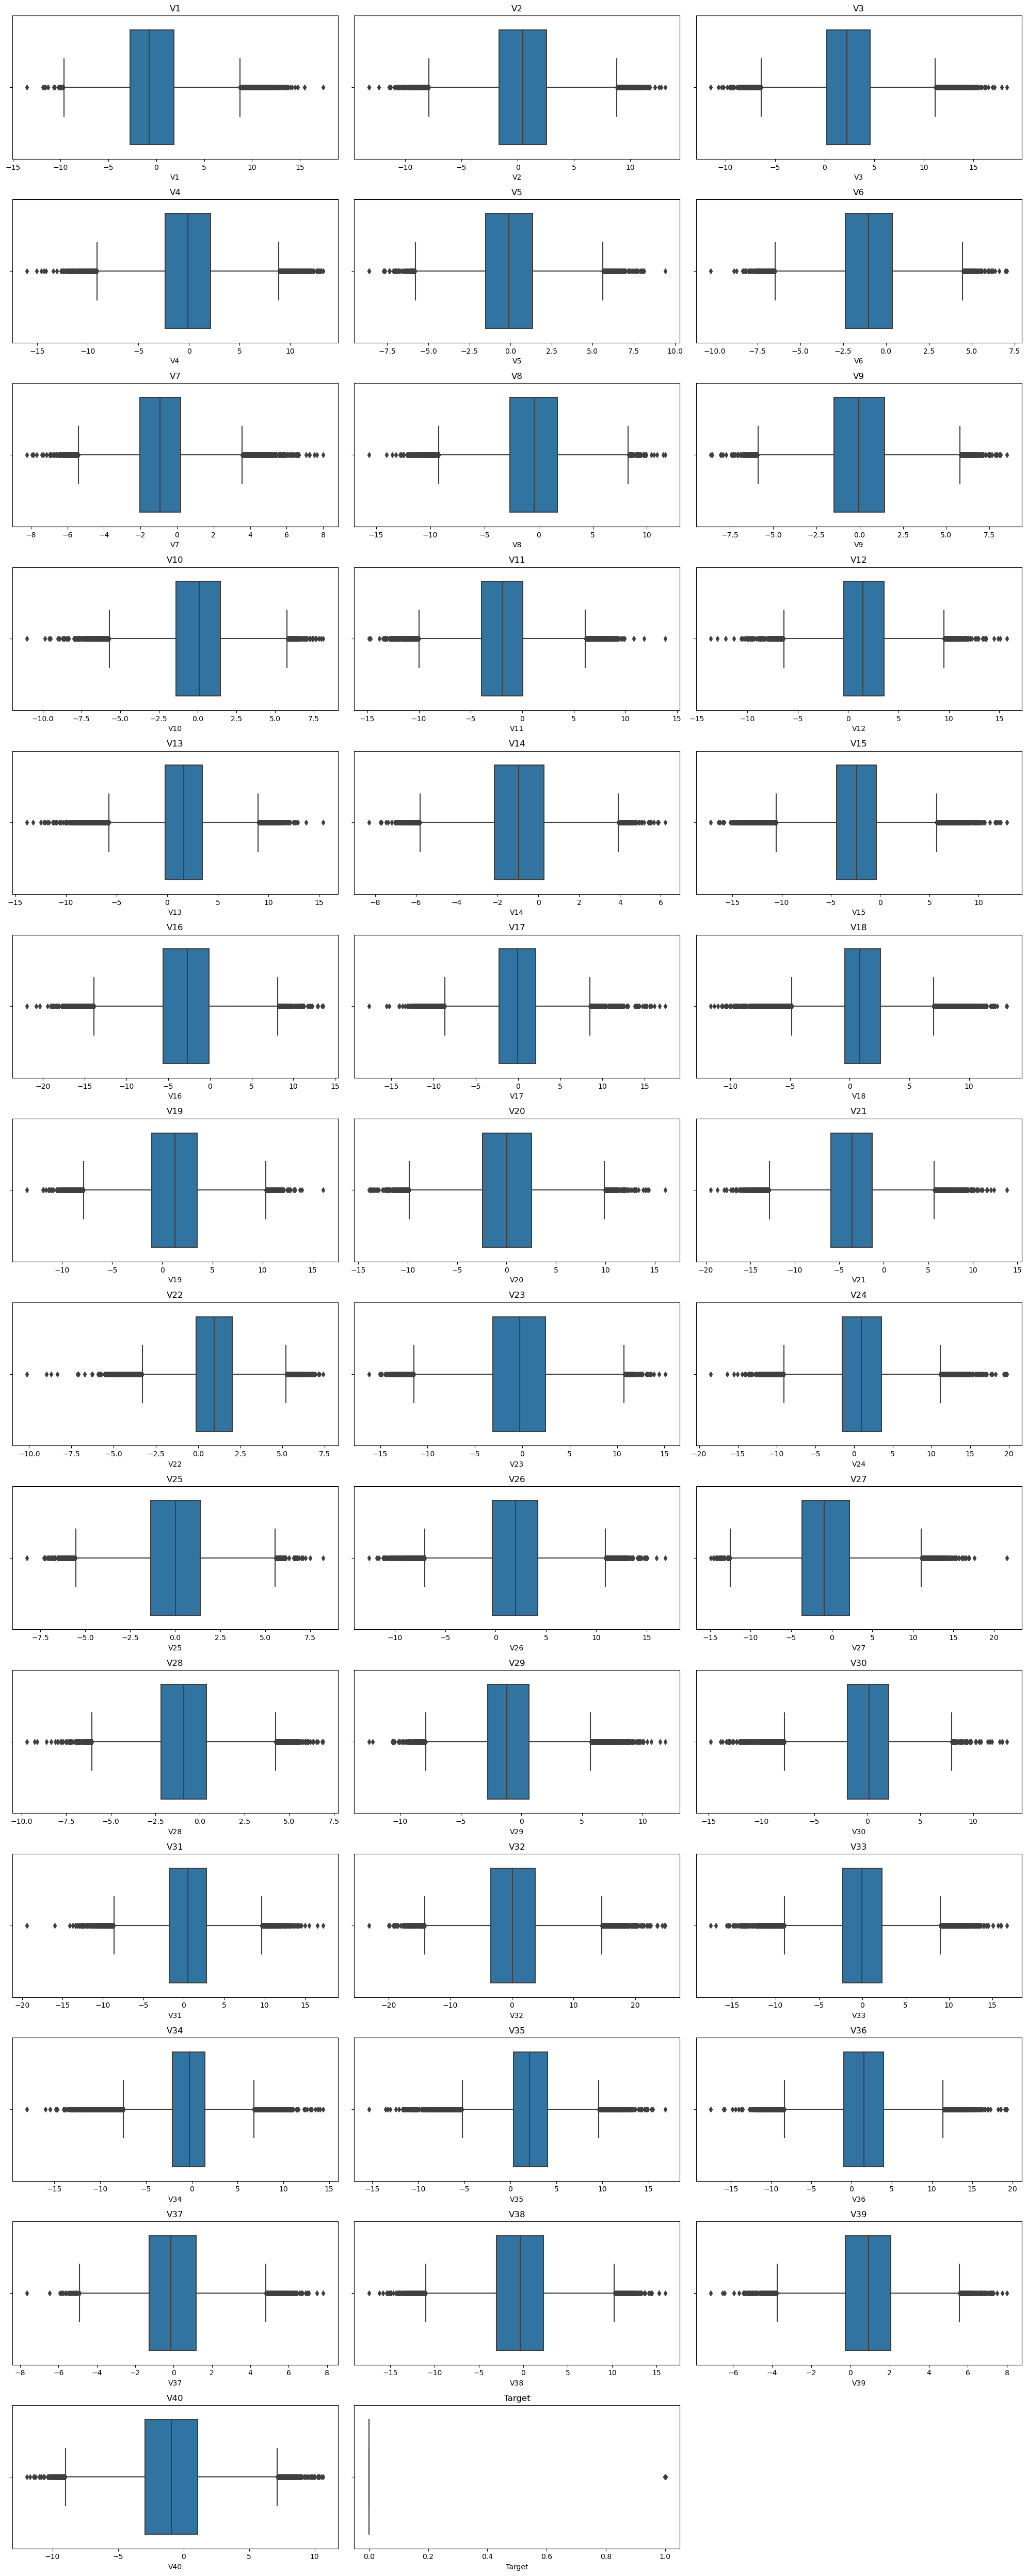

In [15]:
cols = data.columns.tolist()

plt.figure(figsize=(20,50))
for i, variable in enumerate(cols):
    plt.subplot(14, 3, i +1)
    sns.boxplot(data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

* There are positive and negative outliers for all attributes "V1" to "V40". The scale of attributes are more or less the same (somewhere between -20 to +20). Since not much is known about the attributes, the outliers will not be treated and are assumed to be real data trends

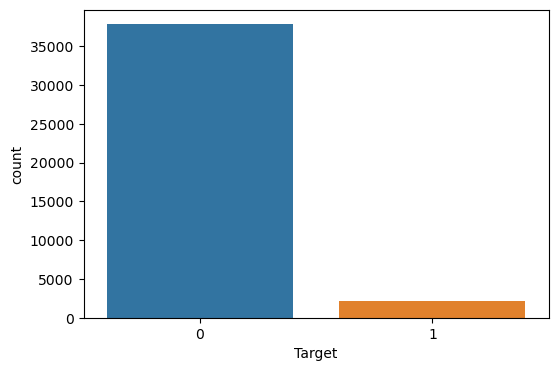

0    37813
1     2187
Name: Target, dtype: int64

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(data["Target"])
plt.show()
data["Target"].value_counts()

* "Target" class is imbalanced with 37813 or 94.53% "No failures (i.e., 0)" and 2187 or 5.47% "Failures (i.e., 1)"

### Data Preprocessing

In [17]:
# Splitting the data
df = data.copy()

X = df.drop(['Target'], axis=1)
y = df['Target']

In [18]:
# Splitting the data into training and validation steps:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print(X_train.shape, X_val.shape)

(28000, 40) (12000, 40)


* There are 28000 rows in the training and 12000 rows in the validation sets

In [19]:
y_train.value_counts()

0    26469
1     1531
Name: Target, dtype: int64

In [20]:
y_val.value_counts()

0    11344
1      656
Name: Target, dtype: int64

* Stratify has maintained a distribution of 94.53% "No failures" or "0" and 5.47% "Failures" or "1" in both the test and validation splits

## Missing Value Treatment
* I used median to impute missing values in "V1" and "V2" columns.

In [21]:
imputer = SimpleImputer(strategy= 'median')
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_val = impute.transform(X_val)

## Model evaluation criterion

### 3 types of cost are associated with the provided problem
* Replacement cost - False Negatives - Predicting no failure, while there will be a failure
* Inspection cost - False Positives - Predicting failure, while there is no failure
* Repair cost - True Positives - Predicting failure correctly

### How to reduce overall cost?
* We need to create a customized metric, that can help to bring down the overall cost
* The cost associated with any model = (TPX15000) + (FPX5000) + (FNX40000)
* And the minimum possible cost will be when, the model will be able to identify all failures, in that case, the cost will be (TP + FN)X15000
* So, we will try to maximize Minimum cost/Cost associated with model

### Let's create two functions to calculate different metrics and confusion matrix

In [22]:
# Defining a function to compute diff metrics to check performance of a classification problem
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check model performance
    
    model: classifier
    predictors: independant variables
    target: dependant variables
    """
    
    TP = confusion_matrix(target, model.predict(predictors))[1, 1]
    FP = confusion_matrix(target, model.predict(predictors))[0, 1]
    FN = confusion_matrix(target, model.predict(predictors))[1, 0]
    Cost = TP * 15 + FP * 5 + FN * 40  # maintenance cost by using the model
    Min_Cost = (
        TP + FN
    ) * 15  # minimum possible maintenance cost = number of actual positives
    Percent = (
        Min_Cost/ Cost
    )  # ratio of minimun possible maintenance cost and maintenance cost by model
    
    # prediciting using the independant variables
    pred = model.predict(predictors)
    
    acc = accuracy_score(target, pred) 
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)
    
    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "Minumum_Vs_Moel_cost": Percent,
        },
        index =[0]
    )
    
    return df_perf
    

In [69]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion matrix with percentages
    
    model: Classifier
    predictors: independant variables
    target: dependant variables
    """
    
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

### Defining scorer to be used for hyperparameter tuning
* Every prediction of a classification model will be either a TP, FP, FN or TN
* For this classification problem, we need to reduce the maintenance cost, which can be reiterated as:
* Maximize (minimum possible maintenance cost/maintenance cost)

In [24]:
# defining metric to be used for optimization and with cross-validation
def Minimum_Vs_Model_cost(y_train, y_pred):
    """
    We want the model to optimize the maintenance cost and reduce it to the lowest possible value.
    The lowest possible maintenance cost will be achieved when each sample is predicted correctly.

    In such a scenario, the maintenance cost will be the total number of failures times the maintenance cost of replacing one generator,
    which is given by (TP + FN) * 40 (i.e., the actual positives*40).
    For any other scenario,
    the maintenance cost associated with the model will be given by (TP * 15 + FP * 5 + FN * 40).

    We will use the ratio of these two maintenance costs as the cost function for our model.
    The greater the ratio, the lower the associated maintenance cost and the better the model.
    """
    TP = confusion_matrix(y_train, y_pred)[1, 1]
    FP = confusion_matrix(y_train, y_pred)[0, 1]
    FN = confusion_matrix(y_train, y_pred)[1, 0]
    return ((TP + FN) * 15) / (TP * 15 + FP * 5 + FN * 40)

# A value of .80 here, will represent that the minimum maintenance cost is 80% of the maintenance cost associated with the model.
# Since minimum maintenance cost is constant for any data, when minimum cost will become 100% of maintenance cost associated with the model
# Model will have give the least possible maintenance cost.


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Higher the values, the lower the maintenance cost

# Model Building with Original Data

In [25]:
models = []  # Empty list to store all the models

# Appending models into the list

models.append(
    ("Logistic Regression", LogisticRegression(solver='newton-cg', random_state=1))
)   #Newton-CG is a numerical optimization algorithm used to find the minimum of a function

models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []

# loop through all models to get the mean cross validated score

print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))


Cross-Validation Performance:

Logistic Regression: 0.5315403616048175
dtree: 0.6560666496504416
Random forest: 0.7109742970474746
Bagging: 0.6812807591389467
Adaboost: 0.6023360315420371
GBM: 0.6782623334842277
Xgboost: 0.7664209311641565


In [26]:
for name, model in models:
    model.fit(X_train, y_train)
    scores = Minimum_Vs_Model_cost(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

Logistic Regression: 0.5319050376375217
dtree: 1.0
Random forest: 0.9989125706829056
Bagging: 0.933916226108174
Adaboost: 0.6077808654227869
GBM: 0.7310202132739138
Xgboost: 1.0


This is the training performance which I got

In [27]:
print('\n Validation Performance')
for name, model in models:
    model.fit(X_train, y_train)
    scores = Minimum_Vs_Model_cost(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


 Validation Performance
Logistic Regression: 0.5191242416249011
dtree: 0.6584141853462696
Random forest: 0.7158966897053474
Bagging: 0.6809688581314879
Adaboost: 0.5885167464114832
GBM: 0.6742034943473793
Xgboost: 0.7769443347808922


* The cross validation training performance scores (Customized metrics) are similar to the validation score. This indicates that the default algorithms on original dataset are able to generalize well.
* There is a tendency for some models(decision tree, random forest, bagging and XGBoost) to overfit the training set; as the training performance score (customized metric) approaches.

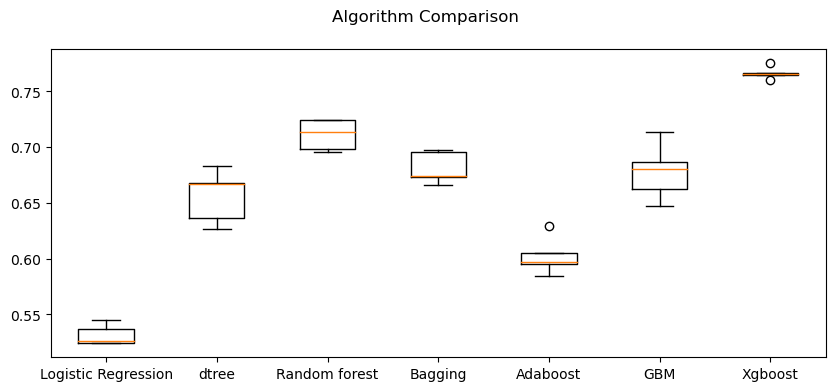

In [28]:
# plotting boxplots for CV scores of all models defined above

fig = plt.figure(figsize=(10,4))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

* XGBoost (~ 0.77) and Random Forest (~ 0.72) have the best average (& median) training cross validation scores (on the customized metric). This is closely followed by Bagging Classifier(~0.69).
* XGBoost and AdaBoost each have one outlier as can be observed form the boxplot.
* These boxplot widths(spread of scores) is small for XGBoost, Random Forest and Bagging Classifiers as well, indicating these are reliable models to choose for further optimization.

## Model Buliding with Oversampled Training Data

In [29]:
print(
    "Before Oversampling, counts of label '1 (Failures)': {}".format(sum(y_train == 1))
)
print(
    "Before Oversampling, counts of label '0 (No failures)': {} \n".format(
        sum(y_train == 0)
    )
)

Before Oversampling, counts of label '1 (Failures)': 1531
Before Oversampling, counts of label '0 (No failures)': 26469 



In [30]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [31]:
print(
    "After Oversampling, counts of label '1 (Failures)': {}".format(
        sum(y_train_over == 1)
    )
)
print(
    "After Oversampling, counts of label '0 (No failures)': {} \n".format(
        sum(y_train_over == 0)
    )
)

After Oversampling, counts of label '1 (Failures)': 26469
After Oversampling, counts of label '0 (No failures)': 26469 



* To handle class imbalance in "Target" attribute, synthetic minority oversampling technique was employed to generate synthetic data points for minority class of importance (i.e, class "1" or No failures)
* After applying SMOTE, we have equal number of class "1" and class "0" target outcomes

In [32]:
models_list = []  # Empty list to store all the models

# Appending models into the list

models_list.append(
    ("Logistic Regression", LogisticRegression(solver='newton-cg', random_state=1))
)  #Newton-CG is a numerical optimization algorithm used to find the minimum of a function
models_list.append(("dtree", DecisionTreeClassifier(random_state=1)))
models_list.append(("Random forest", RandomForestClassifier(random_state=1)))
models_list.append(("Bagging", BaggingClassifier(random_state=1)))
models_list.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_list.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_list.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results_list = []
names_list = []
score_list = []

# Loop throigh all the models to get the mean cross val score

print('\n' "Cross-Validation Performance" '\n')

for name, model in models_list:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator= model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results_list.append(cv_result)
    names_list.append(name)
    print('{}: {}'.format(name, cv_result.mean()))


Cross-Validation Performance

Logistic Regression: 0.7991885856657728
dtree: 0.935799411923789
Random forest: 0.9684099076356956
Bagging: 0.9567710595379042
Adaboost: 0.8302735716914681
GBM: 0.8698213334032019
Xgboost: 0.9743558381158399


In [33]:
print("\n" "Training Performance:" "\n")

for name, model in models_list:
    model.fit(X_train_over, y_train_over)
    scores = Minimum_Vs_Model_cost(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))


Training Performance:

Logistic Regression: 0.7997723770483548
dtree: 1.0
Random forest: 1.0
Bagging: 0.9976255088195387
Adaboost: 0.8345542254779346
GBM: 0.8726427535276275
Xgboost: 0.9975127190503109


In [34]:
print("\n" "Validation Performance:" "\n")

for name, model in models_list:
    model.fit(X_train_over, y_train_over)
    scores = Minimum_Vs_Model_cost(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Validation Performance:

Logistic Regression: 0.5025536261491318
dtree: 0.6377187297472456
Random forest: 0.802937576499388
Bagging: 0.7633824670287044
Adaboost: 0.5696092619392186
GBM: 0.7294292068198666
Xgboost: 0.8125516102394715


* The cross validation training performance scores(customized metric) are much higher than validation performance score. This indicates that the default algorithms on oversampled dataset are not able to generalize well.
* It is likely that the algorithms are overfitting the noise in the training sets which explains the trends in the observed performance scores (cross val training scores ~ training scores >> validation score). This will be a concern taking these models to production.

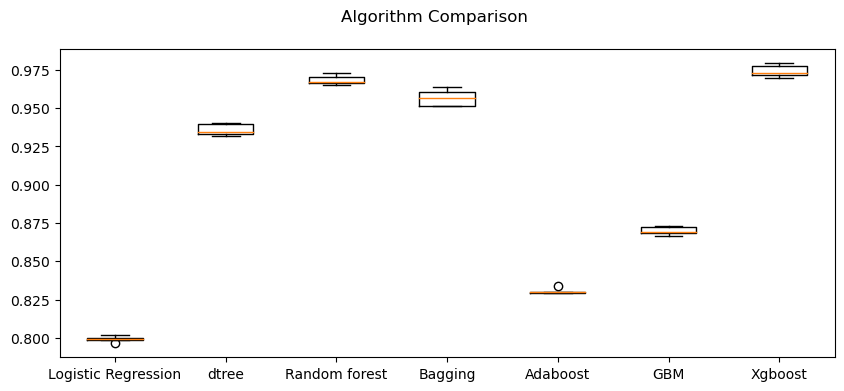

In [35]:
# plotting boxplots for CV scores of all the models defined above

fig = plt.figure(figsize=(10,4))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_list)
ax.set_xticklabels(names)

plt.show()

* The average (& median) training cross val scores on the oversampled dataset has increased to match training performance scores across algorithms. This indicates potential overfitting of noise in the training datasets.

## Model building with Undersampled data

In [36]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [37]:
print(
    "After Undersampling, counts of label '1 (Failures)': {}".format(
        sum(y_train_un == 1)
    )
)
print(
    "After Undersampling, counts of label '0 (No failures)': {} \n".format(
        sum(y_train_un == 0)
    )
)

After Undersampling, counts of label '1 (Failures)': 1531
After Undersampling, counts of label '0 (No failures)': 1531 



* Another technique to handle class imbalance in "Target" attribute is random undersampling, wherein only random samples from the majority class are chosen for model building. While this helps in dealing with models potentially overfitting, it can often lead to poor performing models due to "loss of information" from not considering all datapoints available
* After random undersampling, we again have equal number of class "1" and class "0" (and overall less number of datapoints for model building)

In [38]:
models_un = []  # Empty list to store all the models

# Appending models into the list

models_un.append(
    ("Logistic Regression", LogisticRegression(solver="newton-cg", random_state=1))
)
models_un.append(("dtree", DecisionTreeClassifier(random_state=1)))
models_un.append(("Random forest", RandomForestClassifier(random_state=1)))
models_un.append(("Bagging", BaggingClassifier(random_state=1)))
models_un.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_un.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_un.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results_un = []  # Empty list to store all model's CV scores
names_un = []  # Empty list to store name of the models
score_un = []

# loop through all models to get the mean cross validated score

print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_un:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results_un.append(cv_result)
    names_un.append(name)
    print("{}: {}".format(name, cv_result.mean()))


Cross-Validation Performance:

Logistic Regression: 0.7724863000214184
dtree: 0.7623582706765808
Random forest: 0.842602547619812
Bagging: 0.810537034879969
Adaboost: 0.7875970384722428
GBM: 0.8260845219126203
Xgboost: 0.8426666723788049


In [39]:
print("\n" "Training Performance:" "\n")

for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores = Minimum_Vs_Model_cost(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))


Training Performance:

Logistic Regression: 0.772322179250042
dtree: 1.0
Random forest: 1.0
Bagging: 0.9624895222129086
Adaboost: 0.8197394253078708
GBM: 0.8726961808854266
Xgboost: 1.0


In [40]:
print("\n" "Validation Performance:" "\n")

for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores = Minimum_Vs_Model_cost(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Validation Performance:

Logistic Regression: 0.4932330827067669
dtree: 0.4738743077293523
Random forest: 0.7348767737117252
Bagging: 0.6691601496089765
Adaboost: 0.5512605042016807
GBM: 0.6755921730175077
Xgboost: 0.7569230769230769


* The performance score (customized metric) have dropped on the validation undersampled dataset than original dataset. This could be likely that the algorithms are overfitting the noise & underfitting the information in the undersampled datasets. This will again be a concern taking these models to production

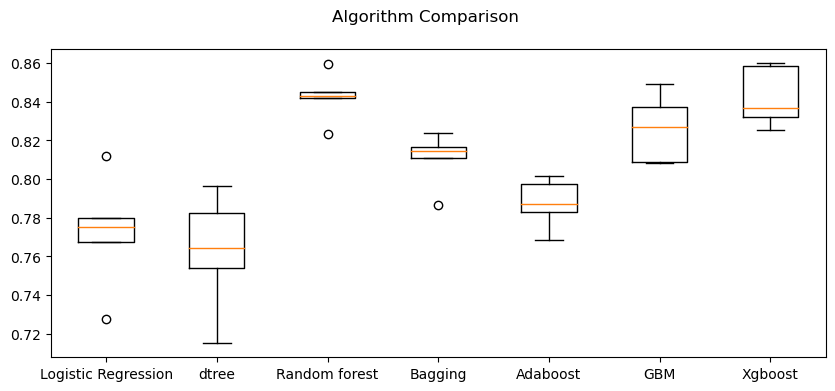

In [41]:
# Plotting boxplots for CV scores of all models defined above

fig = plt.figure(figsize=(10,4))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_un)
ax.set_xticklabels(names)

plt.show()

* The algorithms are able to give better performance on the cross validation training scores on undersampled dataset in comparison to original dataset as can be seen from the boxplots. However, the issue is the lack of generalizatbility in carrying forth the performance to the validation set

## Model Selection

* Models built on original datasets have given generalized performance on cross validating training and validation sets unlike models built on oversampled or undersampled sets.
* Mean cross val scores on training sets are highest with XGBoost, RandomForest & Bagging Classfiers (~77, ~72 and ~69 resp). I will further tune these models and try to increase their performance.

### Hyperparamater Tuning

In [42]:
# defining model - XGBoost Hyperparameter Tuning
model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(150, 300, 50),
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=3,
    random_state=1,
    n_jobs=-1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.2, 'gamma': 0} with CV score=nan:


In [43]:
# I will now build a model with best parameters
xgb_tuned = XGBClassifier(
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.1,
    gamma=3,
    random_state=1,
    eval_metric="logloss",
)

# Fit the model on training data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [44]:
# Calculating different metrics on training set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1,Minumum_Vs_Moel_cost
0,0.999,1.000,0.983,0.992,0.994


In [46]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
print('Validation Performance')
xgboost_random_val

Validation Performance


,Accuracy,Recall,Precision,F1,Minumum_Vs_Moel_cost
0,0.991,0.866,0.961,0.911,0.810


* The best hyperparameters using RandomizedSearch CV for XGBoost model were found to be: subsample 0.9, scale_pos_weight 10, n_estimators 250, learning_rate 0.1 and gamma 3
* The average cross validation training performance score (customized metric) using the best parameter XGBoost model is 0.80. This is similar to the performance score (customized metric) on the validation set i.e., 0.81. This indicates the model may generalize with a performance score of ~0.80-0.81
* The model does however have a tendency to overfit the training set as can be observed from training performance (customized metric score of 0.994)

In [47]:
# defining model - Random Forest Hyperparameter Tuning
model2 = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

param_grid2 = {
    "n_estimators": [150, 250],
    "min_samples_leaf": np.arange(1, 3),
    "max_features": ["sqrt", "log2"],
    "max_samples": np.arange(0.2, 0.6, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Calling RandomizedSearchCV
randomized_cv2 = RandomizedSearchCV(
    estimator=model2,
    param_distributions=param_grid2,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv2.fit(X_train, y_train)
print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv2.best_params_, randomized_cv2.best_score_
    )
)

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.5000000000000001, 'max_features': 'sqrt'} with CV score=0.6920650879825658:


In [48]:
# building model with best parameters
rf_tuned = RandomForestClassifier(
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.5000000000000001,
    max_features="sqrt",
    random_state=1,
)

# Fit the model on training data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', max_samples=0.5000000000000001,
                       n_estimators=250, random_state=1)

In [49]:
# Calculating different metrics on training set
rf_random_train = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
print("Training performance:")
rf_random_train

Training performance:


,Accuracy,Recall,Precision,F1,Minumum_Vs_Moel_cost
0,0.993,0.882,0.998,0.937,0.836


In [50]:
# Calculating different metrics on validation set
rf_random_val = model_performance_classification_sklearn(rf_tuned, X_val, y_val)
print("Validation performance:")
rf_random_val

Validation performance:


,Accuracy,Recall,Precision,F1,Minumum_Vs_Moel_cost
0,0.985,0.741,0.988,0.847,0.697


* The best hyperparameters using RandomizedSearch CV for Random forest model were found to be: n_estimators 250, min_sample_leaf 1, max_features 'sqrt', max_samples 0.5
* The average 5 fold cross validation training performance score (customized metric) using the best parameter Random forest model is 0.692. This is similar to the performance score (customized metric) on the validation set i.e., 0.697. This indicates the model may generalize with a performance score of ~0.69
* The model has a slight tendency (although not as much as XGBoost tuned) to overfit the training set as can be observed from training performance (customized metric score of 0.8336)

In [51]:
# defining model - Bagging Classifier Hyperparameter Tuning
model3 = BaggingClassifier(random_state=1)

param_grid3 = {
    "max_samples": [0.8, 0.9],
    "max_features": [0.8, 0.9],
    "n_estimators": [40, 50],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Calling RandomizedSearchCV
randomized_cv3 = RandomizedSearchCV(
    estimator=model3,
    param_distributions=param_grid3,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv3.fit(X_train, y_train)
print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv3.best_params_, randomized_cv3.best_score_
    )
)

Best parameters are {'n_estimators': 50, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.7092140237024578:


In [52]:
# building model with best parameters
bagging_tuned = BaggingClassifier(
    n_estimators=50, max_samples=0.9, max_features=0.8, random_state=1,
)

# Fit the model on training data
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [53]:
# Calculating different metrics on train set
bagging_random_train = model_performance_classification_sklearn(
    bagging_tuned, X_train, y_train
)
print("Training performance:")
bagging_random_train

Training performance:


,Accuracy,Recall,Precision,F1,Minumum_Vs_Moel_cost
0,0.999,0.989,1.000,0.994,0.982


In [54]:
# Calculating different metrics on validation set
bagging_random_val = model_performance_classification_sklearn(
    bagging_tuned, X_val, y_val
)
print("Validation performance:")
bagging_random_val

Validation performance:


,Accuracy,Recall,Precision,F1,Minumum_Vs_Moel_cost
0,0.985,0.745,0.978,0.846,0.699


* The best hyperparameters using RandomizedSearch CV for Bagging Classifier were found to be: n_estimator 50, max_samples 0.9, max_features 0.8
* The average 5 fold cross validation training performance score (customized metric) using the best parameter Bagging classifier is 0.71. This is similar to the performance score (customized metric) on the validation set i.e., 0.70. This indicates the model may generalize with a performance score of ~0.69-0.71
* The model does however have a tendency to overfit the training set as can be observed from training performance (customized metric score of 0.982)

# Model Performance Comparison and choosing the final model

In [56]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [xgboost_random_train.T, rf_random_train.T, bagging_random_train.T], axis=1,
)
models_train_comp_df.columns = [
    "XGBoost Tuned with Random search",
    "Random forest Tuned with Random search",
    "Bagging Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost Tuned with Random search,Random forest Tuned with Random search,Bagging Tuned with Random Search
Accuracy,0.999,0.993,0.999
Recall,1.000,0.882,0.989
Precision,0.983,0.998,1.000
F1,0.992,0.937,0.994
Minumum_Vs_Moel_cost,0.994,0.836,0.982


In [58]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [xgboost_random_val.T, rf_random_val.T, bagging_random_val.T,], axis=1,
)
models_val_comp_df.columns = [
    "XGBoost Tuned with Random search",
    "Random forest Tuned with Random search",
    "Bagging Tuned with Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,XGBoost Tuned with Random search,Random forest Tuned with Random search,Bagging Tuned with Random Search
Accuracy,0.991,0.985,0.985
Recall,0.866,0.741,0.745
Precision,0.961,0.988,0.978
F1,0.911,0.847,0.846
Minumum_Vs_Moel_cost,0.810,0.697,0.699


* The XGBoost Tuned model with Random Search is giving the highest performance score (Minimum_Vs_Model_cost) of 0.81 on the Validation Set. Although this algorithm is giving much higher performance on training set (0.998) indicating overfitting, I still observe the following -

  * The average cross validation Training performance score (Minimum_Vs_Model_cost) with this model is 0.80, similar to the validation score of 0.81
  * The accuracy, precision and F1 scores of the training & validation models are very much comparable
* I will choose this tuned model to see if it can generalize well on the testing dataset to give a likewise high performance score (Minimum_Vs_Model_cost) ~ 0.8

# Test set final performance

In [59]:
test = pd.read_csv('test.csv')

In [60]:
X_test = test.drop(['Target'], axis=1)
y_test = test['Target']

In [61]:
y_test.value_counts()

0    9453
1     547
Name: Target, dtype: int64

* The test data has likewise 94.53% "0" or "No failures" and 5.47% "1" or "Failures"

In [62]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      9989 non-null   float64
 1   V2      9993 non-null   float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

* There are 11 & 7 missing values for attributes V1 and V2

In [63]:
imputer = SimpleImputer(strategy='median')
impute = imputer.fit(X_test)
X_test = imputer.transform(X_test)

In [64]:
print("\n" "Test Performance:" "\n")

final_model = XGBClassifier(
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.1,
    gamma=3,
    random_state=1,
    eval_metric="logloss",
)
name = "XGboost_tuned"

final_model.fit(X_train, y_train)
final_scores = Minimum_Vs_Model_cost(y_test, final_model.predict(X_test))
print("{}: {}".format(name, final_scores))


Test Performance:

XGboost_tuned: 0.7939042089985486


In [65]:
xgboost_test = model_performance_classification_sklearn(final_model, X_test, y_test)
xgboost_test

,Accuracy,Recall,Precision,F1,Minumum_Vs_Moel_cost
0,0.989,0.854,0.947,0.898,0.794


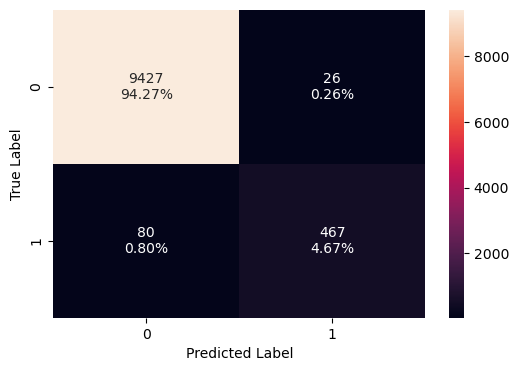

In [70]:
# Creating confusion matrix
confusion_matrix_sklearn(final_model, X_test, y_test)

* The XGBoost tuned model is generalizing well on the test data with a Minimum_Vs_Model_cost of 0.792 (the cross validation training average score was 0.799 and the validation score was 0.81)
* The model is able to make predictions resulting in a maintenance cost ~ (1/0.794 or ~1.26) times the minimum maintenance cost possible

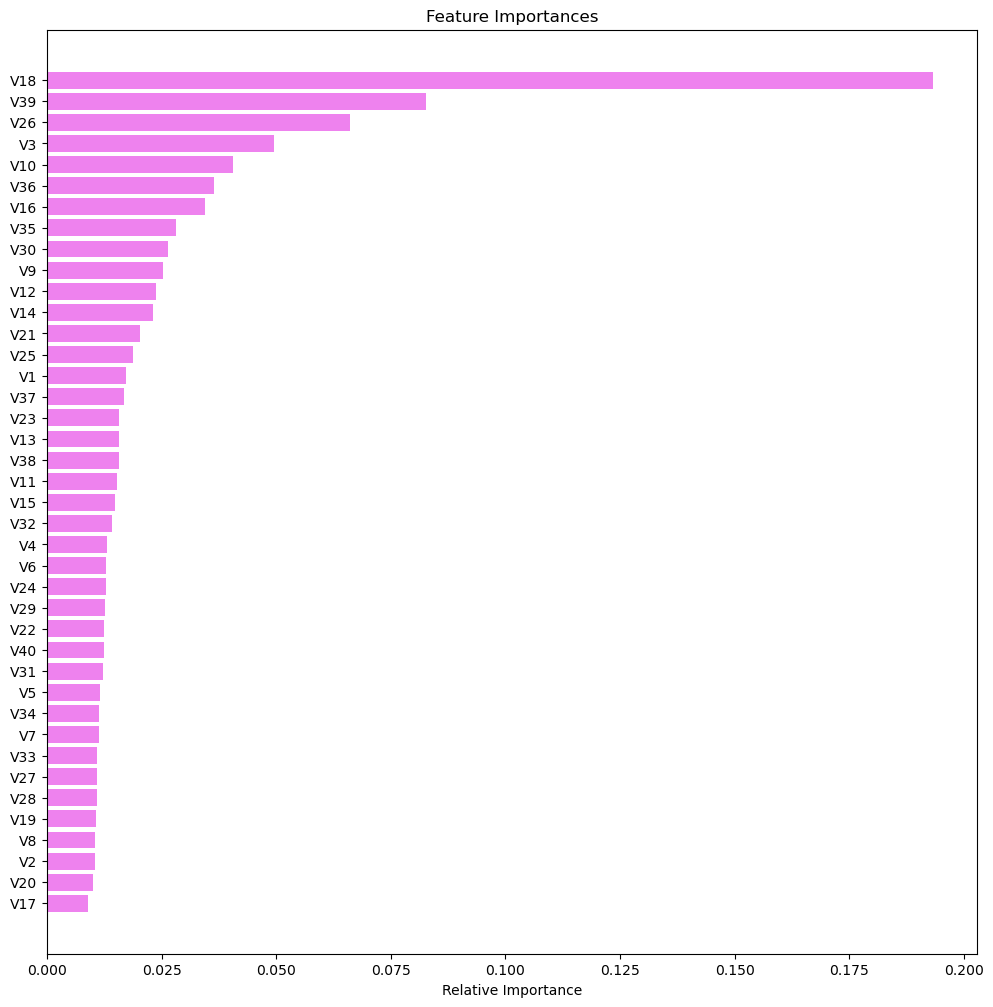

In [71]:
feature_names = data.columns
importances = final_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


# Pipelines to build the final model

* Pipelines can be used to put the final model in production

In [72]:
# As I already know the final model, I will not be splitting train set into train and validation

X_train_pipeline = train.drop(['Target'], axis=1)
y_train_pipeline = train['Target']


In [73]:
X_test_pipeline = test.drop("Target", axis=1)
y_test_pipeline = test["Target"]

In [74]:
model_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='median')),
        (
            "XGB", 
            XGBClassifier(
                subsample=0.9, 
                scale_pos_weight=10, 
                n_estimators = 250, 
                learning_rate=0.1, 
                gamma=3, 
                random_state=1, 
                eval_metrics='logloss',
            ),
        ), 
    ]
)

# Fit the model on training data
model_pipeline.fit(X_train_pipeline, y_train_pipeline)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               eval_metrics='logloss', feature_types=None,
                               gamma=3, grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_const

In [75]:
# transforming and predicting
model_pipeline.predict(X_test_pipeline)

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
Minimum_Vs_Model_cost(y_test_pipeline, model_pipeline.predict(X_test_pipeline))

0.8055964653902798

* The pipeline performance is as expected (Minimum_Vs_Model_cost 0.799) indicating it was built accurately to replicate the final chosen model after necessary pre processing

# Business Insights and Conclusions

* A machine learning model has been built to minimize the total maintenance cost of machinery/processes used for wind energy production

  * The final tuned model (XGBoost) was chosen after building ~7 different machine learning algorithms & further optimizing for target class imbalance (having few "failures" and many "no failures" in dataset) as well as finetuning the algorithm performance (hyperparameter and cross validation techniques)

  * A pipeline was additionally built to productionise the final chosen model


* The model is expected to generalize well in terms of predictions & expected to result in a maintenance cost ~1.26 times minimum possible maintenance cost. Having no model in place for predictions could potentially result in costs as high as ~2.67 minimum possible maintenance cost. Hence, productionising the model has a large cost saving advantage


* The main attributes of importance for predicting failures vs. no failures were found to be "V18", "V39", "V26", "V3" & "V10" in order of decreasing importance. This added knowledge can be used to refine the process of collecting more frequent sensor information to be used in improving the machine learning model to further decrease maintenance costs